**Install & Import Libraries**

In [1]:
# Install libraries (usually pre-installed in Colab, but safe to run)
!pip install pandas matplotlib

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Display plots inside notebook
%matplotlib inline

**Load Datasets from New York Open Data**

In [3]:
# Step 2: Load Dataset (100k rows for speed)
URL_CASE = "https://data.ny.gov/api/views/e8ky-4vqe/rows.csv?accessType=DOWNLOAD"

# Load first 100k rows
case = pd.read_csv(URL_CASE, nrows=100000, low_memory=False)

# Clean column names
case.columns = case.columns.str.strip()

# Preview dataset
case.head()

,Year,Crash Descriptor,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved
0,2021,Property Damage Accident,12:00,01/01/2021,Friday,Y,Daylight,NEW YORK,OTHER,NEW YORK,Straight and Level,Clear,NaN,Dry,NaN,Not Applicable,"Guide Rail - End, Collision With Fixed Object",1
1,2021,Property Damage Accident,5:12,01/01/2021,Friday,Y,Dark-Road Lighted,NEW YORK,OTHER,NEW YORK,Curve and Level,Clear,NaN,Dry,NaN,Not Applicable,"Guide Rail - Not At End, Collision With Fixed ...",1
2,2021,Injury Accident,5:25,01/01/2021,Friday,Y,Dark-Road Lighted,QUEENS,OTHER,QUEENS,Straight and Level,Clear,NaN,Dry,NaN,Riding/Walking/Skating Along Highway Against T...,"Pedestrian, Collision With",1
3,2021,Property Damage Accident,2:21,01/01/2021,Friday,Y,Dark-Road Lighted,QUEENS,OTHER,QUEENS,Straight and Level,Clear,NaN,Dry,NaN,Not Applicable,"Other Motor Vehicle, Collision With",3
4,2021,Injury Accident,11:30,01/01/2021,Friday,Y,Daylight,QUEENS,REAR END,QUEENS,Straight and Level,Clear,Traffic Signal,Dry,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2


**Inspect Columns**

In [5]:
print("Columns in CASE dataset:\n", case.columns.tolist())

Columns in CASE dataset:
 ['Year', 'Crash Descriptor', 'Time', 'Date', 'Day of Week', 'Police Report', 'Lighting Conditions', 'Municipality', 'Collision Type Descriptor', 'County Name', 'Road Descriptor', 'Weather Conditions', 'Traffic Control Device', 'Road Surface Conditions', 'DOT Reference Marker Location', 'Pedestrian Bicyclist Action', 'Event Descriptor', 'Number of Vehicles Involved']


**Normalize Date & Time Columns**

In [7]:
# Find column with 'DATE' in its name
date_col = [col for col in case.columns if 'DATE' in col.upper()][0]
print("Date column detected:", date_col)

# Convert to datetime and create helpers
case[date_col] = pd.to_datetime(case[date_col], errors='coerce')
case['month'] = case[date_col].dt.month
case['Year-Month'] = case[date_col].dt.to_period('M')
case['Day of Week'] = case[date_col].dt.day_name()

Date column detected: Date


**Visualizations**

**A) Crashes per Month**

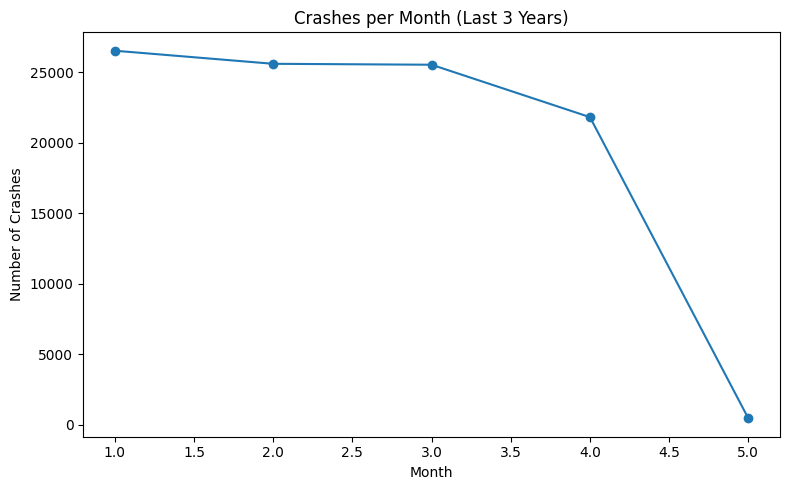

In [8]:
monthly = case.groupby("month").size().rename("crashes").sort_index()

plt.figure(figsize=(8,5))
monthly.plot(kind="line", marker="o")
plt.title("Crashes per Month (Last 3 Years)")
plt.xlabel("Month")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**B) Top 10 Counties by Total Crashes**

['Year', 'Crash Descriptor', 'Time', 'Date', 'Day of Week', 'Police Report', 'Lighting Conditions', 'Municipality', 'Collision Type Descriptor', 'County Name', 'Road Descriptor', 'Weather Conditions', 'Traffic Control Device', 'Road Surface Conditions', 'DOT Reference Marker Location', 'Pedestrian Bicyclist Action', 'Event Descriptor', 'Number of Vehicles Involved', 'month', 'Year-Month']
Using column for geographic visualization: County Name


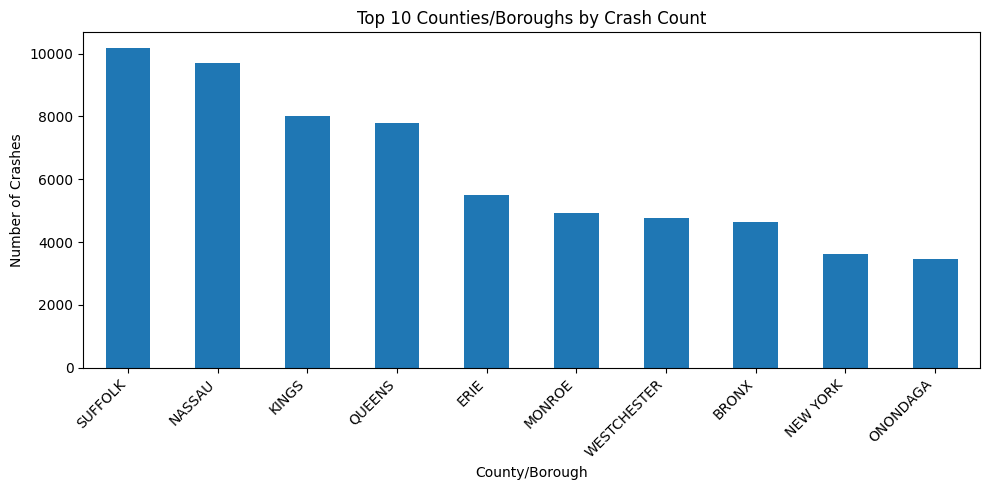

In [10]:
# List all columns
print(case.columns.tolist())

# Automatically find a geographic column
geo_col = None
for col in case.columns:
    if 'COUNTY' in col.upper():
        geo_col = col
        break
    elif 'BOROUGH' in col.upper():
        geo_col = col
        break

if geo_col is None:
    print("No COUNTY or BOROUGH column found!")
else:
    print("Using column for geographic visualization:", geo_col)

# Top 10 Counties/Boroughs by crash count
top_geo = case[geo_col].value_counts().head(10)

plt.figure(figsize=(10,5))
top_geo.plot(kind="bar")
plt.title("Top 10 Counties/Boroughs by Crash Count")
plt.xlabel("County/Borough")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


**C) Crashes by Day of Week**

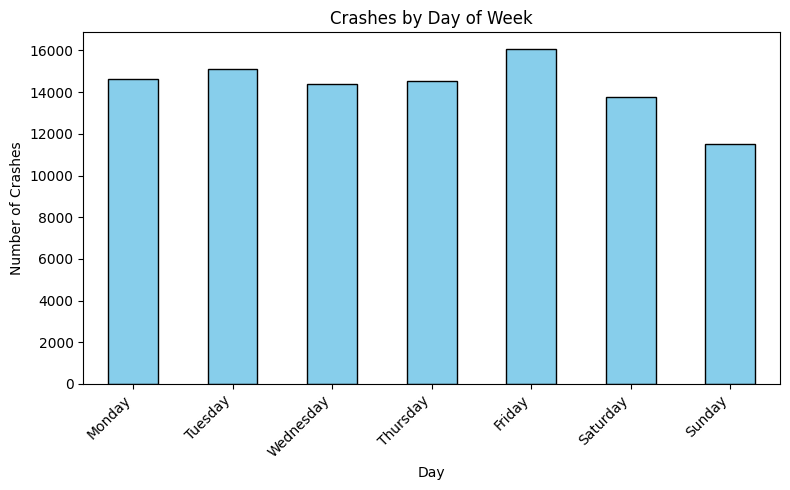

In [11]:
plt.figure(figsize=(8,5))

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

case['Day of Week'].value_counts().reindex(order).plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)

plt.title("Crashes by Day of Week")
plt.xlabel("Day")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**D) Crashes by Weather Conditions**

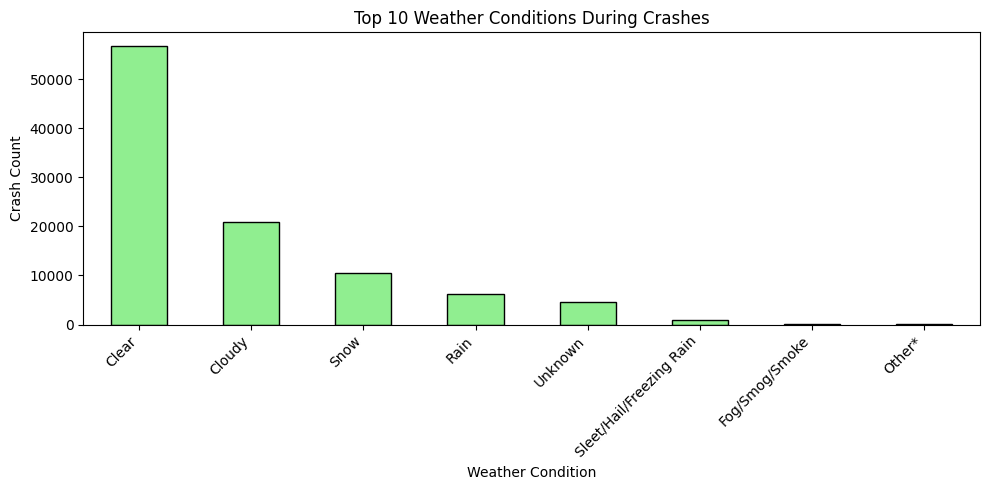

In [12]:
if 'Weather Conditions' in case.columns:
    plt.figure(figsize=(10,5))
    case['Weather Conditions'].value_counts().head(10).plot(
        kind='bar',
        color='lightgreen',
        edgecolor='black'
    )

    plt.title("Top 10 Weather Conditions During Crashes")
    plt.xlabel("Weather Condition")
    plt.ylabel("Crash Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Weather Conditions column not found.")

**E) Crashes by Lighting Conditions**

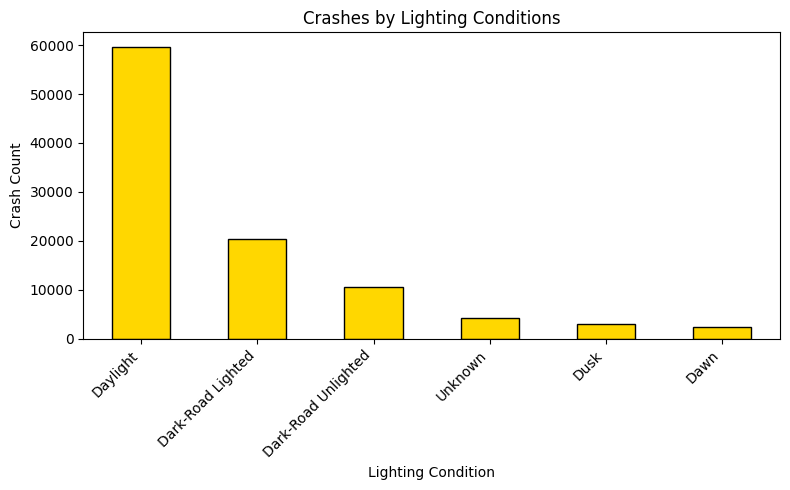

In [13]:
if 'Lighting Conditions' in case.columns:
    plt.figure(figsize=(8,5))
    case['Lighting Conditions'].value_counts().plot(
        kind='bar',
        color='gold',
        edgecolor='black'
    )

    plt.title("Crashes by Lighting Conditions")
    plt.xlabel("Lighting Condition")
    plt.ylabel("Crash Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Lighting Conditions column not found.")

**F) Monthly Crash Trend**

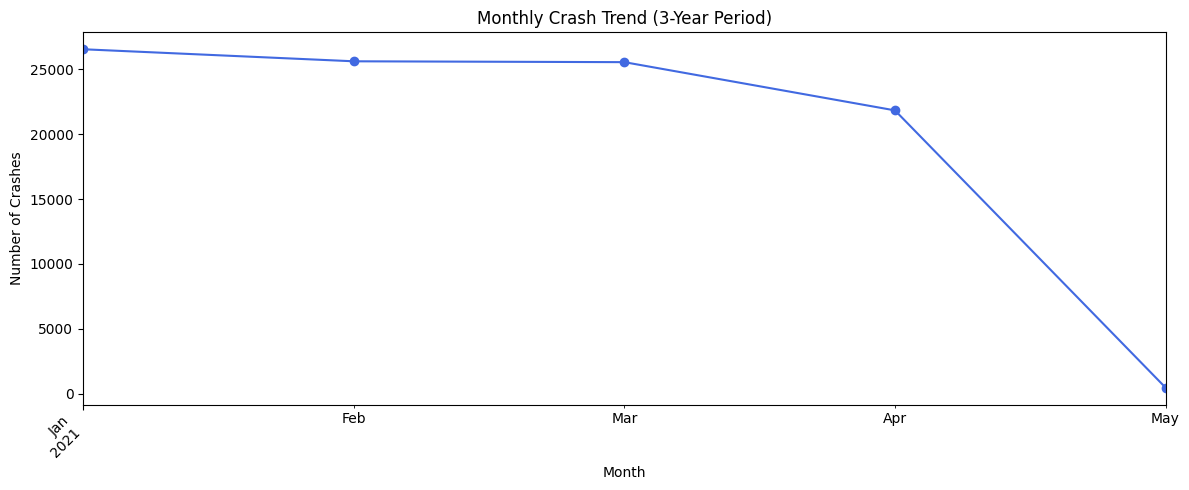

In [14]:
monthly_trend = case.groupby('Year-Month').size()

plt.figure(figsize=(12,5))
monthly_trend.plot(marker='o', color='royalblue')
plt.title("Monthly Crash Trend (3-Year Period)")
plt.xlabel("Month")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()